In [29]:
%matplotlib inline
import numpy as np
import torch
import torch.optim as optim
import matplotlib.pyplot as plt
torch.set_printoptions(edgeitems=2, linewidth=75)

t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

def model(t_u, w1, w2, b):
    return w2 * t_u ** 2 + w1 * t_u + b
#def model(t_u,w,b):
#    return w * t_u + b

def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

def training_loop(n_epochs, optimizer, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        t_p = model(t_u, *params) 
        loss = loss_fn(t_p, t_c)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if epoch < 3:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
        if epoch % 2000 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
    return params

params = torch.tensor([1.0, 1.0, 0.0], requires_grad = True)
#params = torch.tensor([1.0, 0.0], requires_grad = True)
learning_rate = 1e-1
optimizer = optim.Adam([params], lr = learning_rate)


params = training_loop(n_epochs = 50000, optimizer = optimizer, params = params, t_u = t_u,t_c = t_c)



Epoch 1, Loss 11709471.000000
Epoch 2, Loss 9475895.000000
Epoch 2000, Loss 3.406404
Epoch 4000, Loss 3.249142
Epoch 6000, Loss 2.907587
Epoch 8000, Loss 2.508180
Epoch 10000, Loss 2.300986
Epoch 12000, Loss 2.197233
Epoch 14000, Loss 2.144474
Epoch 16000, Loss 1022.205811
Epoch 18000, Loss 2.105970
Epoch 20000, Loss 2.097617
Epoch 22000, Loss 2.094201
Epoch 24000, Loss 2.092484
Epoch 26000, Loss 2.493231
Epoch 28000, Loss 5.101640
Epoch 30000, Loss 2.091354
Epoch 32000, Loss 2.090834
Epoch 34000, Loss 2.093323
Epoch 36000, Loss 2.132064
Epoch 38000, Loss 2.090769
Epoch 40000, Loss 2.090727
Epoch 42000, Loss 2.090725
Epoch 44000, Loss 2.094048
Epoch 46000, Loss 132.052597
Epoch 48000, Loss 2.615655
Epoch 50000, Loss 33.471905


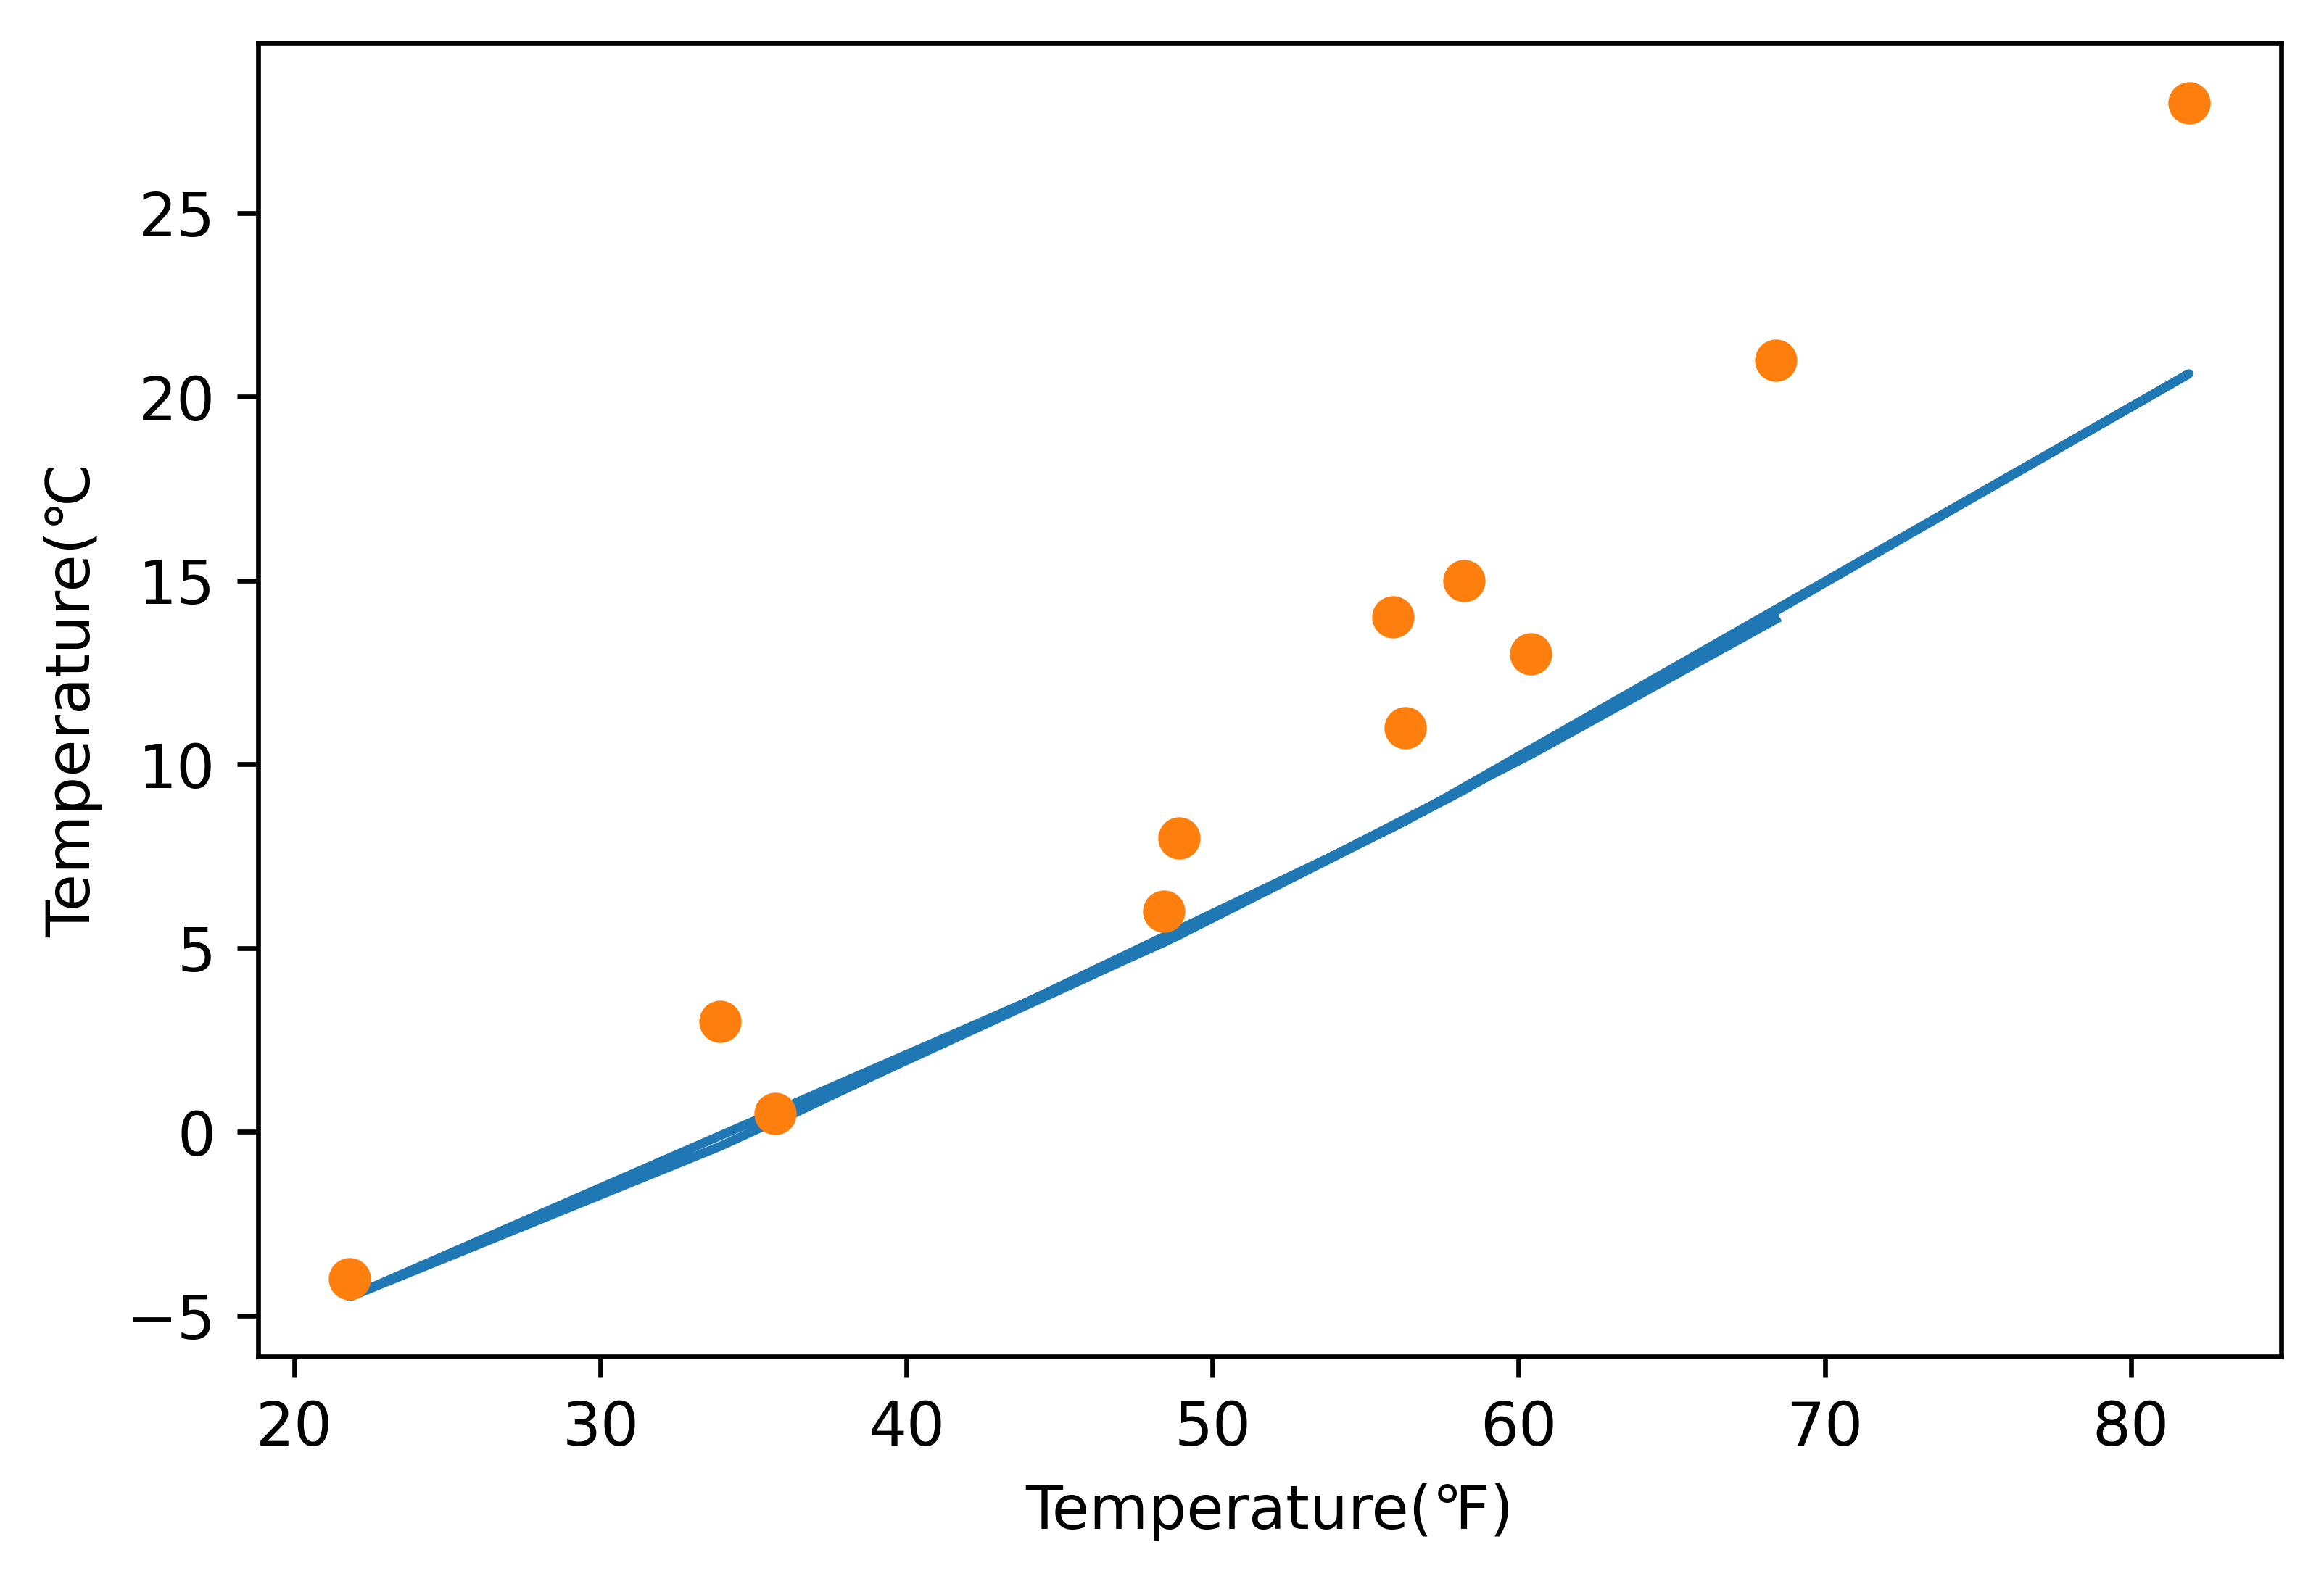

In [31]:
%matplotlib inline
from matplotlib import pyplot as plt

t_p = model(t_u,*params)
fig = plt.figure(dpi = 600)
plt.xlabel("Temperature(℉)")
plt.ylabel("Temperature(℃")
plt.plot(t_u.numpy(), t_p.detach().numpy())
plt.plot(t_u.numpy(),t_c.numpy(), 'o')